!pip install qiskit-aer

!pip install qiskit-ibm-runtime 

### Basic Quantum Circuit 

Quantum computing is a revolutionary technology that leverages the principles of quantum mechanics to process information in fundamentally new ways. Unlike classical computers, which use bits to represent data as 0s or 1s, quantum computers use quantum bits, or qubits, which can exist in multiple states simultaneously thanks to superposition. This enables quantum computers to solve certain types of problems much faster than classical computers.

Quantum computing has the potential to revolutionize fields such as cryptography, materials science, and complex system simulations. It could help us design new drugs, optimize supply chains, and even tackle climate change by modeling complex systems more efficiently.

Here's a simple example in Qiskit, a popular quantum computing framework, to demonstrate a basic quantum circuit.

In [1]:
!pip install qiskit

^C


In [ ]:
!pip install qiskit_aer 

In [ ]:
!pip install pylatexenc 

In [ ]:
# Import necessary libraries
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Create a Quantum Circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

In [ ]:
# Apply a Hadamard gate to put the qubit into superposition
qc.h(0)

In [ ]:
# Measure the qubit
qc.measure(0, 0)

In [ ]:
# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

In [ ]:
# Get the counts of outcomes
counts = result.get_counts()
print("Counts:", counts)

In [ ]:
#Print circuit 
print(qc)

In [ ]:
# Visualize the circuit
qc.draw('mpl')
#plt.show()

In [ ]:
# Visualize the results
plot_histogram(counts)
#plt.show()

This simple quantum circuit applies a Hadamard gate to a qubit, creating a superposition of states, and then measures the result. Running this circuit multiple times will show a roughly equal distribution of 0s and 1s, illustrating the probabilistic nature of quantum measurements.

[0.00238847 0.00238847 0.00238753 ... 0.00144514 0.00146493 0.00151109]


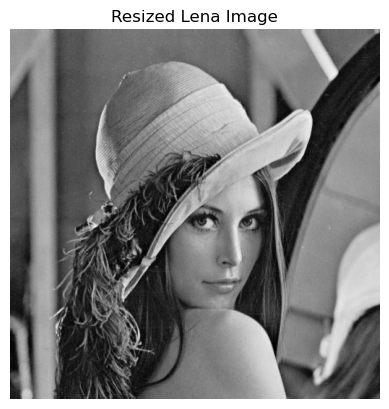

Quantum Statevector:
Result(backend_name='statevector_simulator', backend_version='0.15.1', qobj_id='', job_id='3547e9d8-16a5-4c46-babd-58343103a1ca', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([0.00238847+0.j, 0.00238847+0.j, 0.00238753+0.j, ...,
             0.00144514+0.j, 0.00146493+0.j, 0.00151109+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=18, name='circuit-162', qreg_sizes=[['q', 18]], metadata={}), status=DONE, seed_simulator=2100109555, metadata={'batched_shots_optimization': False, 'required_memory_mb': 4, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 18, 'num_clbits': 0, 'time_taken': 0.0058286, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 

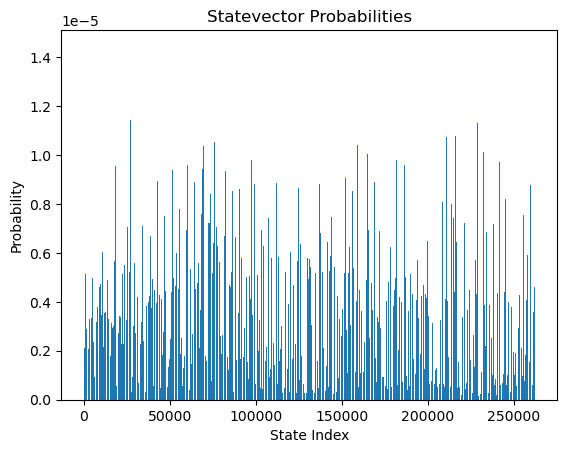

In [1]:
import numpy as np
from qiskit import  QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator, StatevectorSimulator
#from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from skimage import io, color, transform
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the Lena image
def preprocess_image(image_path):
    # Load the image and convert to grayscale
    image = io.imread(image_path)
    grayscale = color.rgb2gray(image)
    
    # Resize the image to the specified size
    #resized = transform.resize(grayscale, size, anti_aliasing=True)
    preprocessed_image = grayscale;
    # Flatten the image and normalize pixel values to [0, 1]
    flattened = preprocessed_image.flatten()
    normalized = flattened / np.linalg.norm(flattened)
    return normalized, preprocessed_image

# Path to Lena image (use a local path or URL to Lena image)
image_path = 'lena.png'  # Replace with your Lena image file path
pixel_data, preprocessed_image = preprocess_image(image_path)
print(pixel_data)
# Display the resized image
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Resized Lena Image")
plt.axis('off')
plt.show()

# Step 2: Amplitude Embedding in Quantum Circuit
def create_amplitude_embedding_circuit(pixel_data):
    num_qubits = int(np.ceil(np.log2(len(pixel_data))))  # Determine required qubits
    padded_data = np.pad(pixel_data, (0, 2**num_qubits - len(pixel_data)), 'constant')  # Pad to power of 2
    
    # Create a quantum circuit with the required qubits
    circuit = QuantumCircuit(num_qubits)
    
    # Use the Statevector to initialize the quantum state with amplitudes
    initial_state = Statevector(padded_data)
    circuit.initialize(initial_state, circuit.qubits)
    return circuit

quantum_circuit = create_amplitude_embedding_circuit(pixel_data)

# Step 3: Simulate the Quantum Circuit
#simulator = AerSimulator()
#compiled_circuit = transpile(qc, simulator)
#result = simulator.run(compiled_circuit).result()

# Define the AerSimulator backend
#simulator = AerSimulator()

# Transpile the circuit for the AerSimulator
#t = transpile(quantum_circuit, simulator)

# Execute the circuit
#result = simulator.run(t).result()

# Extract the statevector
#statevector = result.get_statevector()


#backend =  AerSimulator() #.get_backend('statevector_simulator')
#t = transpile(quantum_circuit, backend)
#qobj = assemble(t)
#result = backend.run(qobj).result()
#statevector = result.get_statevector()

# Use the Qiskit Aer simulator to run the circuit
#simulator = AerSimulator()
simulator = StatevectorSimulator()
compiled_circuit = transpile(quantum_circuit, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()
# Step 4: Visualization and Verification
print("Quantum Statevector:")
print(result)

# Show histogram of statevector probabilities
probabilities = np.abs(statevector)**2
plt.bar(range(len(probabilities)), probabilities)
plt.title("Statevector Probabilities")
plt.xlabel("State Index")
plt.ylabel("Probability")
plt.show()